In [1]:
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.config['database.user'] = 'dimitri'

import random
import alm1

Connecting dimitri@mesoscale-activity.datajoint.io:3306


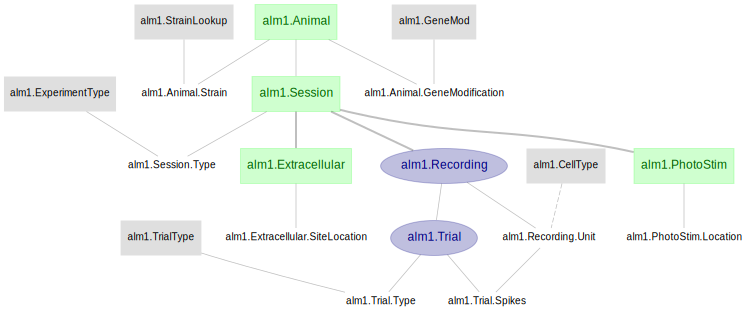

In [2]:
alm1.schema.erd()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


OrderedDict([('animal', 214430), ('session', 3)])
Hits: left 35 right 29 Units:  7
.......

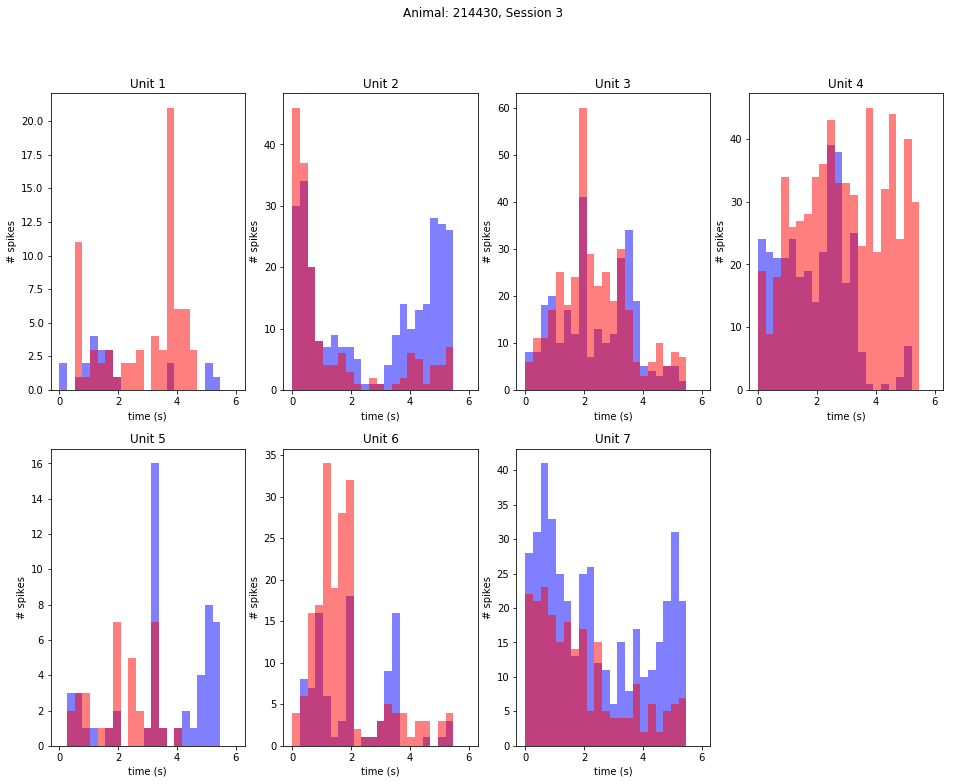

In [3]:
%pylab inline

# pick a dataset randomly
keys = list((alm1.Recording() & alm1.Trial.Spikes()).fetch.keys())
key = random.choice(keys)

# plot PSTHs of left (blue) vs right (red) trials
print(key)
good_trials = (alm1.Trial() & key & 'good_trial') - (alm1.Trial.Type() & 'trial_type in ("LickEarly", "StimTrials")')
left_trials = good_trials & (alm1.Trial.Type() & 'trial_type in ("HitL")')
right_trials = good_trials & (alm1.Trial.Type() & 'trial_type in ("HitR")')
n_units = len(alm1.Recording.Unit() & key)
print('Hits: left', len(left_trials), 'right', len(right_trials), 'Units: ', n_units)

ncols = 4
nrows = (n_units + ncols - 1)//ncols
rcParams['figure.figsize'] = (16, 12)

_, ax = plt.subplots(nrows, ncols)
suptitle('Animal: {animal}, Session {session}'.format(**key))
ax  = ax.flatten()
bins = np.linspace(0,6,24)
x = (bins[:-1]+bins[1:])/2
for i, unit_key in enumerate((alm1.Recording.Unit() & key).fetch.keys()):
    print(end='.')
    left = (alm1.Trial()*alm1.Trial.Spikes() & unit_key & left_trials).fetch('start_time', 'spike_times')
    if left[0].size:
        left = np.concatenate([spikes-start for start, spikes in zip(*left)])
        ax[i].hist(left, bins, color='blue', alpha=0.5)
    right = (alm1.Trial()*alm1.Trial.Spikes() & unit_key & right_trials).fetch('start_time', 'spike_times')
    if right[0].size:
        right = np.concatenate([spikes-start for start, spikes in zip(*right)])
        ax[i].hist(right, bins, color='red', alpha=0.5)
    ax[i].set_title('Unit {unit}'.format(**unit_key))
    ax[i].set_xlabel('time (s)')
    ax[i].set_ylabel('# spikes')

# clear unused axes
for i in range(n_units,ncols*nrows):
    ax[i].axis('off')
